In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/processed/manufacturing_clean.csv")
df.head()


,year,month,value
0,2010,1,11344.0
1,2010,2,11327.0
2,2010,3,11353.0
3,2010,4,11411.0
4,2010,5,11485.0


In [3]:
df["date"] = pd.to_datetime(df["year"].astype(str) + "-" + df["month"].astype(str) + "-01")
df = df.sort_values("date")
df.head()


,year,month,value,date
0,2010,1,11344.0,2010-01-01
1,2010,2,11327.0,2010-02-01
2,2010,3,11353.0,2010-03-01
3,2010,4,11411.0,2010-04-01
4,2010,5,11485.0,2010-05-01


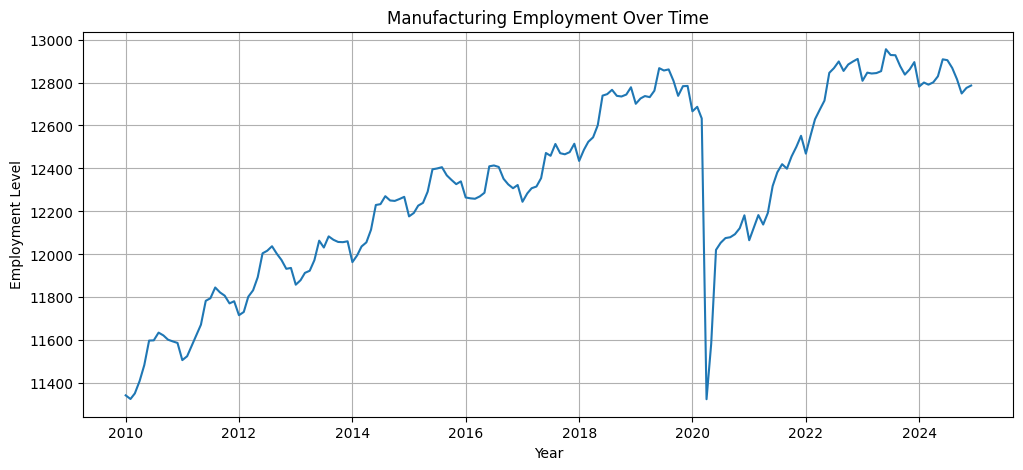

In [4]:
plt.figure(figsize=(12,5))
plt.plot(df["date"], df["value"])
plt.title("Manufacturing Employment Over Time")
plt.xlabel("Year")
plt.ylabel("Employment Level")
plt.grid(True)
plt.show()


In [5]:
yearly = df.groupby("year")["value"].mean().reset_index()

yearly


,year,value
0,2010,11513.666667
1,2011,11709.500000
2,2012,11907.166667
3,2013,11997.833333
4,2014,12160.750000
5,2015,12309.416667
6,2016,12323.500000
7,2017,12406.750000
8,2018,12653.166667
9,2019,12779.583333


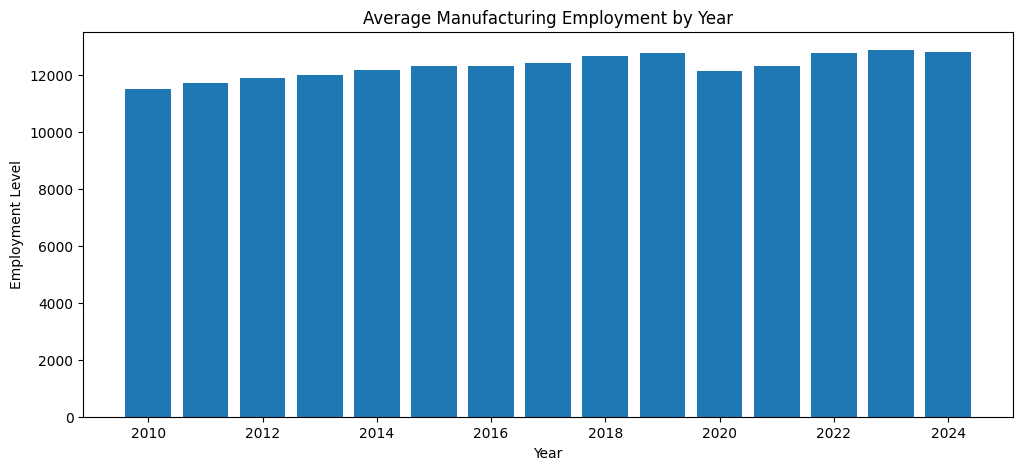

In [6]:
plt.figure(figsize=(12,5))
plt.bar(yearly["year"], yearly["value"])
plt.title("Average Manufacturing Employment by Year")
plt.xlabel("Year")
plt.ylabel("Employment Level")
plt.show()


# Insights & Interpretation

- Manufacturing employment shows…
- Notable increases in years…
- Declines occur around…
- Possible explanations…
- How workforce trends may affect future manufacturing…



In [7]:
import sqlite3
import pandas as pd


conn = sqlite3.connect("../src/db/manufacturing.db")

def run_query(query):
    return pd.read_sql_query(query, conn)


In [8]:
run_query("SELECT * FROM manufacturing LIMIT 10;")


,year,month,value,date
0,2010,1,11344.0,2010-1-01
1,2010,2,11327.0,2010-2-01
2,2010,3,11353.0,2010-3-01
3,2010,4,11411.0,2010-4-01
4,2010,5,11485.0,2010-5-01
5,2010,6,11599.0,2010-6-01
6,2010,7,11600.0,2010-7-01
7,2010,8,11636.0,2010-8-01
8,2010,9,11623.0,2010-9-01
9,2010,10,11603.0,2010-10-01


In [9]:
run_query("SELECT year, month, value FROM manufacturing LIMIT 5;")


,year,month,value
0,2010,1,11344.0
1,2010,2,11327.0
2,2010,3,11353.0
3,2010,4,11411.0
4,2010,5,11485.0


In [10]:
yearly_sql = run_query("""
SELECT year, AVG(value) AS avg_value
FROM manufacturing
GROUP BY year
ORDER BY year;
""")

yearly_sql


,year,avg_value
0,2010,11513.666667
1,2011,11709.500000
2,2012,11907.166667
3,2013,11997.833333
4,2014,12160.750000
5,2015,12309.416667
6,2016,12323.500000
7,2017,12406.750000
8,2018,12653.166667
9,2019,12779.583333


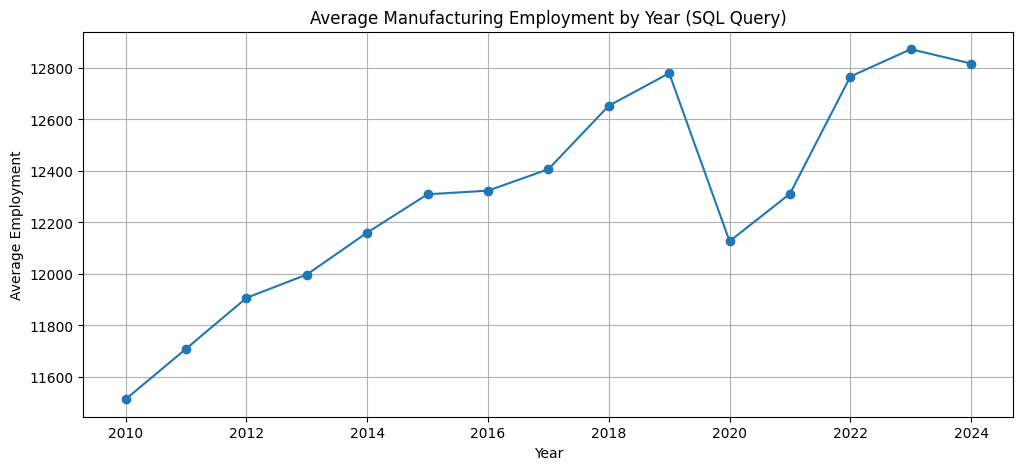

In [11]:
plt.figure(figsize=(12,5))
plt.plot(yearly_sql["year"], yearly_sql["avg_value"], marker="o")
plt.title("Average Manufacturing Employment by Year (SQL Query)")
plt.xlabel("Year")
plt.ylabel("Average Employment")
plt.grid(True)
plt.show()


In [12]:
changes_sql = run_query("""
SELECT 
    year,
    month,
    value,
    value - LAG(value, 1) OVER (ORDER BY year, month) AS month_change
FROM manufacturing;
""")

changes_sql.head()


,year,month,value,month_change
0,2010,1,11344.0,NaN
1,2010,2,11327.0,-17.0
2,2010,3,11353.0,26.0
3,2010,4,11411.0,58.0
4,2010,5,11485.0,74.0


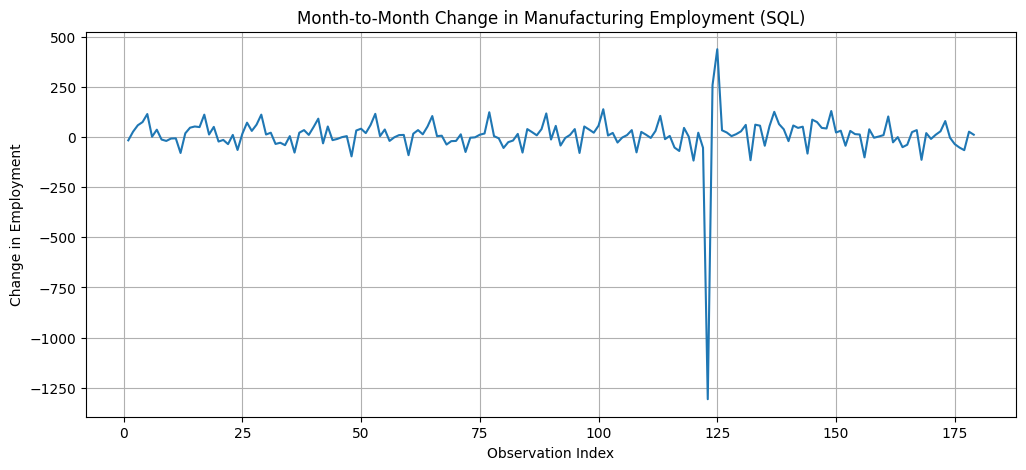

In [13]:
plt.figure(figsize=(12,5))
plt.plot(changes_sql.index, changes_sql["month_change"])
plt.title("Month-to-Month Change in Manufacturing Employment (SQL)")
plt.xlabel("Observation Index")
plt.ylabel("Change in Employment")
plt.grid(True)
plt.show()


In [14]:
biggest_drop = run_query("""
SELECT year, AVG(value) AS avg_value
FROM manufacturing
GROUP BY year
ORDER BY avg_value ASC
LIMIT 3;
""")

biggest_drop


,year,avg_value
0,2010,11513.666667
1,2011,11709.500000
2,2012,11907.166667


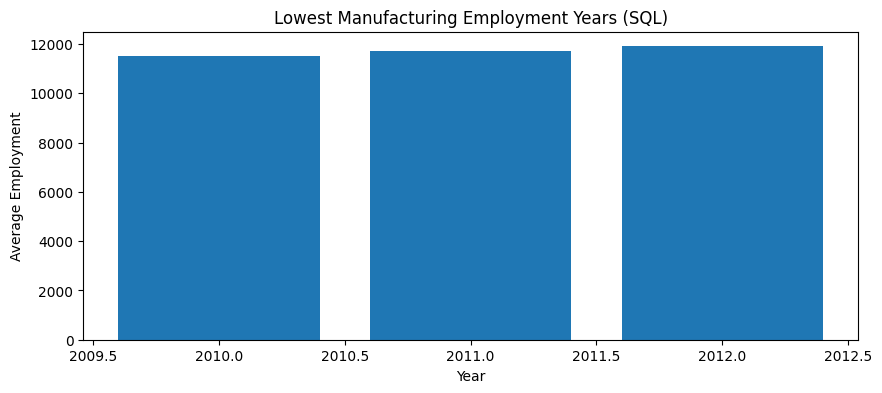

In [15]:
plt.figure(figsize=(10,4))
plt.bar(biggest_drop["year"], biggest_drop["avg_value"])
plt.title("Lowest Manufacturing Employment Years (SQL)")
plt.xlabel("Year")
plt.ylabel("Average Employment")
plt.show()
